# Жукова Ю.Н.

1) импортируем библиотеки, загружаем файл

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('ds_salaries.csv', encoding='windows-1251', sep=',')
df.head(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
#размер и типы данных
df.shape

(607, 12)

In [5]:
df.dtypes

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [6]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [7]:
#5.	Посмотреть, сколько записей для каждой из профессий job_title

In [8]:
df.groupby('job_title', as_index=False).aggregate({'employment_type': 'count'}).sort_values('employment_type', ascending=False)

,job_title,employment_type
22,Data Scientist,143
17,Data Engineer,132
12,Data Analyst,97
38,Machine Learning Engineer,41
48,Research Scientist,16
21,Data Science Manager,12
16,Data Architect,11
7,Big Data Engineer,8
41,Machine Learning Scientist,8
25,Director of Data Science,7


In [9]:
df['job_title'].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Machine Learning Scientist                    8
Big Data Engineer                             8
Data Analytics Manager                        7
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Lead Data Engineer                            6
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Business Data Analyst                         5
Data Engineering Manager                      5
Head of Data                            

In [10]:
#6.	Создать датафрейм data_analysts с данными только где job_title=’Data_Analyst’
df_data_analysts=df.query('job_title == "Data Analyst"')
df_data_analysts

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
14,14,2020,MI,FT,Data Analyst,85000,USD,85000,US,100,US,L
15,15,2020,MI,FT,Data Analyst,8000,USD,8000,PK,50,PK,L
34,34,2020,MI,FT,Data Analyst,41000,EUR,46759,FR,50,FR,L
38,38,2020,EN,FT,Data Analyst,10000,USD,10000,NG,100,NG,S
...,...,...,...,...,...,...,...,...,...,...,...,...
597,597,2022,SE,FT,Data Analyst,170000,USD,170000,US,100,US,M
600,600,2022,EN,FT,Data Analyst,67000,USD,67000,CA,0,CA,M
601,601,2022,EN,FT,Data Analyst,52000,USD,52000,CA,0,CA,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M


In [11]:
#7.	Посмотреть, в компаниях каких стран дата-аналитики в среднем зарабатывают больше всего 
#(аналогичную группировку для размера компаний)
df_country_salary=df_data_analysts\
    .groupby('company_location', as_index = False)\
    .agg({'salary_in_usd':  'mean'})\
    .sort_values('salary_in_usd', ascending=False)

In [12]:
df_country_salary

,company_location,salary_in_usd
9,US,107674.154930
0,CA,81487.333333
1,DE,63831.000000
3,FR,52930.500000
4,GB,50875.600000
5,GR,32313.333333
2,ES,29098.000000
7,NG,10000.000000
8,PK,8000.000000
6,IN,6072.000000


In [13]:
df_country_salary['salary_in_usd']=round(df_country_salary.salary_in_usd, 2)

In [14]:
df_country_salary

,company_location,salary_in_usd
9,US,107674.15
0,CA,81487.33
1,DE,63831.00
3,FR,52930.50
4,GB,50875.60
5,GR,32313.33
2,ES,29098.00
7,NG,10000.00
8,PK,8000.00
6,IN,6072.00


In [45]:
#ГРАФИКИ
import matplotlib.pyplot as plt
import seaborn as sns

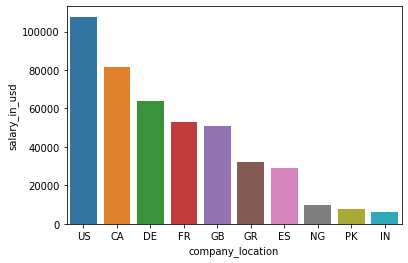

In [46]:
#построение barchart
chart_salary=sns.barplot(x="company_location", y="salary_in_usd", data=df_country_salary)

In [15]:
df_sizecompany_salary=df_data_analysts\
    .groupby('company_size', as_index = False)\
    .agg({'salary_in_usd':  'mean'})\
    .sort_values('salary_in_usd', ascending=False)
df_sizecompany_salary

,company_size,salary_in_usd
1,M,99545.342105
0,L,81777.615385
2,S,47759.000000


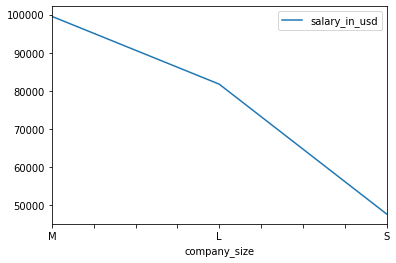

In [51]:
df_sizecompany_salary.plot(x='company_size', y='salary_in_usd')

In [16]:
#8.	В компании из какой страны (и какого размера) максимальное значение зарплаты у дата-аналитика. 
# Какой experience_level у этого аналитика?

In [17]:
df_hihg_salary=df_data_analysts\
    .groupby(['company_location', 'company_size', 'experience_level'], as_index = False)\
    .agg({'salary_in_usd':  'max'})\
    .sort_values('salary_in_usd', ascending=False)\
    .head(1)

In [18]:
df_hihg_salary

,company_location,company_size,experience_level,salary_in_usd
17,US,L,SE,200000


In [19]:
#9.	Сравните среднюю зарплату дата-аналитика и для других топ-5 (по распространенности) профессий (из пункта 5) 
#сравнивайте средние зарплаты только специалистов, соответствующих experience_level!

df_salary_analyt=df_data_analysts\
    .groupby('experience_level', as_index = False)\
    .agg({'salary_in_usd':  'mean'})\
    .sort_values('salary_in_usd', ascending=False)\

In [20]:
df_salary_analyt

,experience_level,salary_in_usd
1,EX,120000.000000
3,SE,111922.629630
2,MI,71699.206897
0,EN,53960.666667


In [21]:
df_salary_analyt=df_salary_analyt.rename(columns={'salary_in_usd': 'analytic_salalry'})
                                                  
    

In [22]:
df_salary_analyt

,experience_level,analytic_salalry
1,EX,120000.000000
3,SE,111922.629630
2,MI,71699.206897
0,EN,53960.666667


In [23]:
df_scientist=df\
    .query('job_title == "Data Scientist"')\
    .groupby('experience_level', as_index = False)\
    .agg({'salary_in_usd':  'mean'})\
    .sort_values('salary_in_usd', ascending=False)

In [24]:
df_scientist

,experience_level,salary_in_usd
2,SE,152971.016393
1,MI,82039.133333
0,EN,55330.909091


In [25]:
df_scientist=df_scientist.rename(columns={'salary_in_usd': 'scientist_salalry'})

In [26]:
df_scientist

,experience_level,scientist_salalry
2,SE,152971.016393
1,MI,82039.133333
0,EN,55330.909091


In [27]:
df_comparison=df_scientist.merge(df_salary_analyt, on='experience_level')


In [28]:
df_comparison

,experience_level,scientist_salalry,analytic_salalry
0,SE,152971.016393,111922.629630
1,MI,82039.133333,71699.206897
2,EN,55330.909091,53960.666667


In [29]:
df_comparison['share']=round((df_comparison.analytic_salalry/df_comparison.scientist_salalry-1)*100, 2)

In [30]:
df_comparison

,experience_level,scientist_salalry,analytic_salalry,share
0,SE,152971.016393,111922.629630,-26.83
1,MI,82039.133333,71699.206897,-12.60
2,EN,55330.909091,53960.666667,-2.48


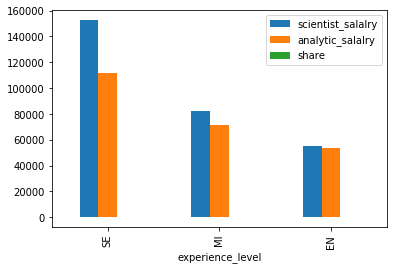

In [53]:
df_comparison.plot.bar(x='experience_level')

In [31]:
#10.	Добавьте в датафрейм (data_analysts) столбец с премией 10%, рассчитанной от зарплаты в usd 
#(*для желающих: в зависимости от level: SE и EX – 10%, EN и MI – 5%).

In [32]:
df_data_analysts['bonus']=df_data_analysts.salary+df_data_analysts.salary*0.1

C:\Anaconda 3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
df_data_analysts

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,bonus
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L,79200.0
14,14,2020,MI,FT,Data Analyst,85000,USD,85000,US,100,US,L,93500.0
15,15,2020,MI,FT,Data Analyst,8000,USD,8000,PK,50,PK,L,8800.0
34,34,2020,MI,FT,Data Analyst,41000,EUR,46759,FR,50,FR,L,45100.0
38,38,2020,EN,FT,Data Analyst,10000,USD,10000,NG,100,NG,S,11000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,597,2022,SE,FT,Data Analyst,170000,USD,170000,US,100,US,M,187000.0
600,600,2022,EN,FT,Data Analyst,67000,USD,67000,CA,0,CA,M,73700.0
601,601,2022,EN,FT,Data Analyst,52000,USD,52000,CA,0,CA,M,57200.0
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,141900.0


In [34]:
# !!!!! как вставить столбец в определенное место, напрмиреh после столбец salary?

In [35]:
df_data_analysts.insert(8, 'gift', df_data_analysts.salary+df_data_analysts.salary*0.2)


In [36]:
df_data_analysts.head(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,gift,employee_residence,remote_ratio,company_location,company_size,bonus
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,86400.0,US,100,US,L,79200.0
14,14,2020,MI,FT,Data Analyst,85000,USD,85000,102000.0,US,100,US,L,93500.0
15,15,2020,MI,FT,Data Analyst,8000,USD,8000,9600.0,PK,50,PK,L,8800.0
34,34,2020,MI,FT,Data Analyst,41000,EUR,46759,49200.0,FR,50,FR,L,45100.0
38,38,2020,EN,FT,Data Analyst,10000,USD,10000,12000.0,NG,100,NG,S,11000.0


In [37]:
#11.	По желанию: провести самостоятельно дополнительный анализ, отвечая на вопрос: а что еще мы можем сказать 
# о дата-аналитиках и их зарплатах по этим файлам.

In [38]:
#самая низкая зарплата у data_analysts
df_low_salary=df_data_analysts\
    .groupby(['company_location', 'company_size', 'experience_level'], as_index = False)\
    .agg({'salary_in_usd':  'min'})\
    .sort_values('salary_in_usd', ascending=True)\
    .head(1)
df_low_salary

,company_location,company_size,experience_level,salary_in_usd
12,IN,S,EN,6072


In [39]:
#страны с наибольшим предложением вакансий data_analysts
df_data_analysts['company_location'].value_counts()\
    .head(5)

US    71
CA     9
GB     5
GR     3
ES     3
Name: company_location, dtype: int64

In [40]:
#Выводы:
# Топ-3 распространенных профессий - Data Scientist, Data Engineer, Data Analyst, с долей в общем количестве представленных 
# профессий 23,6%, 21,7% и 16,0% соответственно.
# Изучаемся профессия - data_analyst. Самая высокая з/п в компании из США на позиции Senior - 200 000$ с численностью работников 
# более 250 человек, самая низкая - в Индии на позиции Entry-level 6072$ численностью менее 50 человек.
# В среднем самые высокие з/п в США, Канаде и Германии.
# Топ-3 стран по рапространенности професии - США, Канада, Англия.
# Средняя з/п на позиции EXPERT - 120 000$, на позицции SENIOR - 111 923$, MIDDLE - 71 699$, ENTRY - 53 961$.
# При сравнительном анализе з/п Data Analyst с з/п Data Scientist выявлено:
# на позиции SENIOR з/п ниже на 26,8%, на позиции MIDDLE - з/п ниже на 12,6%, на позиции ENTRY - з/п ниже на 2,5%.


In [41]:
df_1=df.groupby('job_title', as_index=False).aggregate({'employment_type': 'count'}).sort_values('employment_type', ascending=False)
df_1_count=df_1.employment_type.sum()
df_1.head(5)

,job_title,employment_type
22,Data Scientist,143
17,Data Engineer,132
12,Data Analyst,97
38,Machine Learning Engineer,41
48,Research Scientist,16


In [42]:
df_1_count

607

In [43]:
df_1['spread']=round(df_1.employment_type/df_1_count, 3)

In [44]:
df_1.head(3)

,job_title,employment_type,spread
22,Data Scientist,143,0.236
17,Data Engineer,132,0.217
12,Data Analyst,97,0.160
